In [1]:
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%autoreload
import maxes.analyze_sequence
import maxes.graphs

('a', {'first': 1})
('b', {})
('c', {})
('d', {})
('e', {'last': 1})
(('a', 'b'), {'d': 1000})
(('a', 'c'), {'d': 1000})
(('a', 'd'), {'d': 1000})
(('b', 'a'), {'d': 1000})
(('b', 'd'), {'d': 1000})
(('c', 'a'), {'d': 1000})
(('c', 'b'), {'d': 1000})
(('c', 'e'), {'d': 1})
(('d', 'c'), {'d': 1000})
(('d', 'e'), {'d': 1})
(('d', 'b'), {'d': 1000})


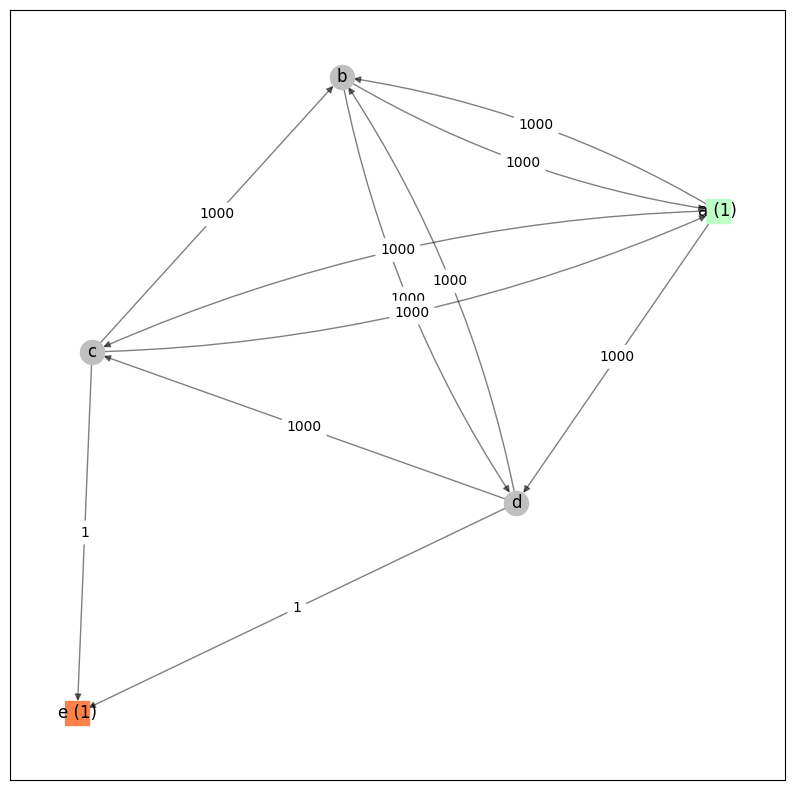

In [3]:
%autoreload
import maxes.analyze_sequence
import maxes.graphs

# 1
g = nx.DiGraph()
g.add_nodes_from([
    ("a", {"first": 1}),
    ("b", {}),
    ("c", {}),
    ("d", {}),
    ("e", {"last": 1}),
])
g.add_edges_from([
    ("a", "b", { "d": 1000 }),
    ("a", "c", { "d": 1000 }),
    ("a", "d", { "d": 1000 }),
    ("b", "a", { "d": 1000 }),
    ("b", "d", { "d": 1000 }),
    ("c", "a", { "d": 1000 }),
    ("c", "b", { "d": 1000 }),
    ("c", "e", { "d": 1 }),
    ("d", "c", { "d": 1000 }),
    ("d", "e", { "d": 1 }),
    ("d", "b", { "d": 1000 }),
])

# 2
# g = nx.DiGraph()
# g.add_nodes_from([
#     ("a", {"first": 1}),
#     ("b", {"first": 2}),
#     ("c", {}),
#     ("d", {"last": 2}),
#     ("e", {"last": 1}),
# ])
# g.add_edges_from([
#     ("a", "b", { "d": 1000 }),
#     ("b", "c", { "d": 1000 }),
#     ("c", "d", { "d": 1 }),
#     ("d", "e", { "d": 1 }),
# ])

print("\n".join([str((node, data)) for node, data in g.nodes.items()]))
print("\n".join([str((edge, data)) for edge, data in g.edges.items()]))

fig, ax = plt.subplots()
# print(fig.get_size_inches()) # [6.4 4.8]
fig.set_size_inches(10, 10)
maxes.analyze_sequence.draw_nx_graph(g, edge_label="d", ax=ax, pos=nx.kamada_kawai_layout(g))

In [63]:
# print(", ".join([f"{node} {data["d"]}" for node, data in g.edges.items()]))

print("Neighbor (outcoming) nodes of \"c\"")
print(", ".join([f"{node} {data}" for node, data in g["c"].items()]))

print("Neighbor (incoming) edges of \"c\"")
print(", ".join([f"{edge} {data}" for edge, data in g.edges.items() if edge[1] == "c"]))

Neighbor (outcoming) nodes of "c"
a {'d': 1000}, b {'d': 1000}, e {'d': 1}
Neighbor (incoming) edges of "c"
('a', 'c') {'d': 1000}, ('d', 'c') {'d': 1000}


In [113]:

path = maxes.graphs.random_weighted_traverse(g, max_steps=10, min_steps=1, weight_feature_name="d")
print(len(path))
print(path)

10
['a', 'd', 'c', 'a', 'b', 'a', 'b', 'd', 'c', 'e']
